### ANGGOTA KELOMPOK 2 PRAKTIKUM PEMBELAJARAN MESIN : <br>
| NIM | NAMA |
|---------|-----------|
| 121450015 | Mujadid Choirus Surya |
| 121450018 | Balqis Dwian Fitri Zamzami |
| 121450042 | Sylviani Primaastuti Ananda |
| 121450108 | Vanessa Olivia Rose |
| 1214500 | Fachrul |

# Tugas Kelompok  

Buatlah sebuah pemograman menggunakan salah satu  atau lebih dari  6 metode 
dengan contoh studi kasus dalam bidang ekonomi contoh saham, bidang ilmiah, 
Kesehatan dan lain lain, buatlah laporan kelompok dan presentasikan hasil yang 
diperoleh melalui vidio dan laporan kelompok.  

Note:  studi  kasus  tidak  boleh  sama,  contoh:    jika  sudah  ada  yang  mengambil 
Kesehatan maka kelompok lain bisa mencari tema yang lain.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import operator as op
from functools import reduce

In [2]:
df = pd.read_csv('dataset.csv')
df.head()

,ID,URL,Brand,Variety,Style,Country,Stars
0,3473,https://www.theramenrater.com/2020/04/05/3473-...,MyKuali,White Fish Broth Noodle,Pack,Malaysia,5
1,3472,https://www.theramenrater.com/2020/04/05/3472-...,MyKuali,Penang White Curry Noodle (New Recipe),Pack,Malaysia,5
2,3471,https://www.theramenrater.com/2020/04/05/3471-...,Ve Wong,Instant Oriental Noodles Soup Chinese Herb - G...,Pack,Taiwan,3.75
3,3470,https://www.theramenrater.com/2020/04/04/3470-...,Myojo,Ippeichan Rich & Sweet Yakisoba,Tray,Japan,5
4,3469,https://www.theramenrater.com/2020/04/03/3469-...,Mykuali,Penang Hokkien Prawn Rice Vermicelli Soup,Bowl,Malaysia,5


In [3]:
df = df[['Brand', 'Stars']]


df = df[(df.Stars != 'NR') & (df.Stars != 'NS') & (df.Stars != 'Unrated')]
df = df[df["Stars"].str.contains("/")==False]

df['Stars'] = df['Stars'].astype(float)

In [4]:
df['Stars'].unique()

array([5.   , 3.75 , 4.   , 4.5  , 1.   , 0.   , 2.5  , 2.   , 3.5  ,
       3.   , 3.25 , 1.5  , 4.25 , 0.25 , 2.25 , 2.75 , 0.5  , 4.75 ,
       1.25 , 1.75 , 0.75 , 1.1  , 2.1  , 0.9  , 3.1  , 4.125, 3.125,
       2.125, 2.9  , 0.1  , 2.8  , 3.7  , 3.4  , 3.6  , 2.85 , 2.3  ,
       3.2  , 3.65 , 1.8  ])

In [5]:
df2 = df.groupby(['Brand']).agg(['mean','count'])

In [6]:
df2.head()

Stars      
                    mean count
Brand                         
1 To 3 Noodles     4.000     1
7 Select           3.625     2
7 Select/Nissin    3.500     1
7-Eleven / Nissin  4.250     1
A-One              2.750     4

In [7]:
df3 = df2[(df2.Stars['count'] >50)]
df3 = df3.sort_values(by=('Stars', 'mean'), ascending=False)
pd.options.display.max_rows = 300
df3.head()

Stars      
                   mean count
Brand                        
Samyang Foods  4.099490    98
Indomie        4.089286    56
Paldo          4.040625    80
Nongshim       4.032328   116
Nissin         3.894272   467

In [8]:
test = df[(df.Brand == 'Samyang Foods') & ((df.Stars>3) & (df.Stars <= 4))]
test.head()

,Brand,Stars
37,Samyang Foods,3.5
39,Samyang Foods,3.5
52,Samyang Foods,4.0
202,Samyang Foods,4.0
207,Samyang Foods,4.0


## Percentage

In [9]:
def count(perc, total):
    res = perc/total * 100
    return res

*Samyang Foods*

In [10]:
print(df[(df.Brand == 'Samyang Foods') & ((df.Stars<=1))].count()['Brand'])
print(df[(df.Brand == 'Samyang Foods') & ((df.Stars>1) & (df.Stars <= 2))].count()['Brand'])
print(df[(df.Brand == 'Samyang Foods') & ((df.Stars>2) & (df.Stars <= 3))].count()['Brand'])
print(df[(df.Brand == 'Samyang Foods') & ((df.Stars>3) & (df.Stars <= 4))].count()['Brand'])
print(df[(df.Brand == 'Samyang Foods') & ((df.Stars>4) & (df.Stars <= 5))].count()['Brand'])

1
1
2
54
40


In [11]:
list = [1, 1 , 2, 54, 40]

for i in list:
    print(count(i, 98))

1.0204081632653061
1.0204081632653061
2.0408163265306123
55.10204081632652
40.816326530612244


*Indomie*

In [12]:
print(df[(df.Brand == 'Indomie') & ((df.Stars<=1))].count()['Brand'])
print(df[(df.Brand == 'Indomie') & ((df.Stars>1) & (df.Stars <= 2))].count()['Brand'])
print(df[(df.Brand == 'Indomie') & ((df.Stars>2) & (df.Stars <= 3))].count()['Brand'])
print(df[(df.Brand == 'Indomie') & ((df.Stars>3) & (df.Stars <= 4))].count()['Brand'])
print(df[(df.Brand == 'Indomie') & ((df.Stars>4) & (df.Stars <= 5))].count()['Brand'])

0
3
6
15
32


In [13]:
list = [0, 3 , 6, 15, 32]

for i in list:
    print(count(i, 98))

0.0
3.061224489795918
6.122448979591836
15.306122448979592
32.6530612244898


*Paldo*

In [14]:
print(df[(df.Brand == 'Paldo') & ((df.Stars<=1))].count()['Brand'])
print(df[(df.Brand == 'Paldo') & ((df.Stars>1) & (df.Stars <= 2))].count()['Brand'])
print(df[(df.Brand == 'Paldo') & ((df.Stars>2) & (df.Stars <= 3))].count()['Brand'])
print(df[(df.Brand == 'Paldo') & ((df.Stars>3) & (df.Stars <= 4))].count()['Brand'])
print(df[(df.Brand == 'Paldo') & ((df.Stars>4) & (df.Stars <= 5))].count()['Brand'])

1
1
2
44
32


In [15]:
list = [1, 1 , 2, 44, 32]

for i in list:
    print(count(i, 80))

1.25
1.25
2.5
55.00000000000001
40.0


*Nongshim*

In [16]:
print(df[(df.Brand == 'Nongshim') & ((df.Stars<=1))].count()['Brand'])
print(df[(df.Brand == 'Nongshim') & ((df.Stars>1) & (df.Stars <= 2))].count()['Brand'])
print(df[(df.Brand == 'Nongshim') & ((df.Stars>2) & (df.Stars <= 3))].count()['Brand'])
print(df[(df.Brand == 'Nongshim') & ((df.Stars>3) & (df.Stars <= 4))].count()['Brand'])
print(df[(df.Brand == 'Nongshim') & ((df.Stars>4) & (df.Stars <= 5))].count()['Brand'])

1
3
8
49
55


In [17]:
list = [1, 3 , 8, 49, 55]

for i in list:
    print(count(i, 116))

0.8620689655172413
2.586206896551724
6.896551724137931
42.241379310344826
47.41379310344828


*Myojo*

In [18]:
print(df[(df.Brand == 'Myojo') & ((df.Stars<=1))].count()['Brand'])
print(df[(df.Brand == 'Myojo') & ((df.Stars>1) & (df.Stars <= 2))].count()['Brand'])
print(df[(df.Brand == 'Myojo') & ((df.Stars>2) & (df.Stars <= 3))].count()['Brand'])
print(df[(df.Brand == 'Myojo') & ((df.Stars>3) & (df.Stars <= 4))].count()['Brand'])
print(df[(df.Brand == 'Myojo') & ((df.Stars>4) & (df.Stars <= 5))].count()['Brand'])

2
3
12
45
37


In [19]:
list = [2, 3, 12, 45, 37]

for i in list:
    print(count(i, 99))

2.0202020202020203
3.0303030303030303
12.121212121212121
45.45454545454545
37.37373737373738


## Distribusi Binomial

*Samyang Foods*

x = 6, Binomial Probability = 0.20716190206014973
x = 7, Binomial Probability = 0.11897811942643731
x = 8, Binomial Probability = 0.04685624780500619
x = 9, Binomial Probability = 0.012109807287442476
x = 10, Binomial Probability = 0.0018546551701488475

Total Probability for x > 5: 0.38696073174918455


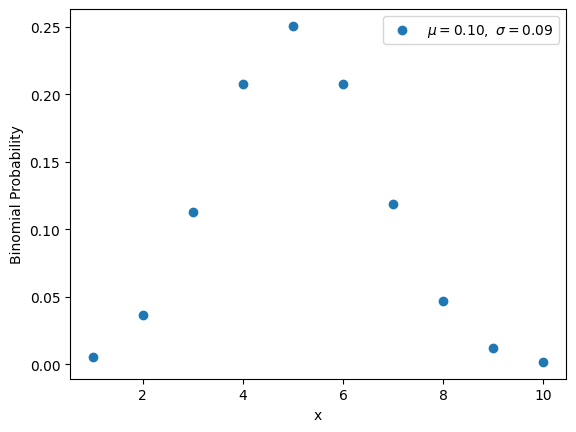

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from functools import reduce
import operator as op

# Fungsi const(n, r) untuk menghitung kombinasi nCr
def const(n, r):
    r = min(r, n - r)
    numer = reduce(op.mul, range(n, n - r, -1), 1)
    denom = reduce(op.mul, range(1, r + 1), 1)
    return numer / denom

# Fungsi binomial(n, p) untuk menghitung distribusi binomial
def binomial(n, p):
    q = 1 - p
    y = [const(n, k) * (p ** k) * (q ** (n - k)) for k in range(n)]
    return y, np.mean(y), np.std(y)

# Menghitung dan menampilkan distribusi binomial
percentage = 0.408
amount = 10
x_values = np.arange(1, 11)
total = 0

for x in x_values:
    if x > 5:
        y, u, s = binomial(amount, percentage)
        total += y[x - 1]

        # Menampilkan hasil distribusi binomial untuk x
        print(f"x = {x}, Binomial Probability = {y[x - 1]}")

print('\nTotal Probability for x > 5:', total)

# Membuat scatter plot dari hasil simulasi dengan label yang mencakup rata-rata dan deviasi standar
plt.scatter(x_values, y[:10], label=r'$\mu=%.2f,\ \sigma=%.2f$' % (u, s))
plt.xlabel("x")
plt.ylabel("Binomial Probability")
plt.legend()
plt.show()


Indomie

x = 6, Binomial Probability = 0.12905891919924356
x = 7, Binomial Probability = 0.05201929730335485
x = 8, Binomial Probability = 0.01437752515548426
x = 9, Binomial Probability = 0.002607792952904972
x = 10, Binomial Probability = 0.00028029690163106525

Total Probability for x > 5: 0.19834383151261872


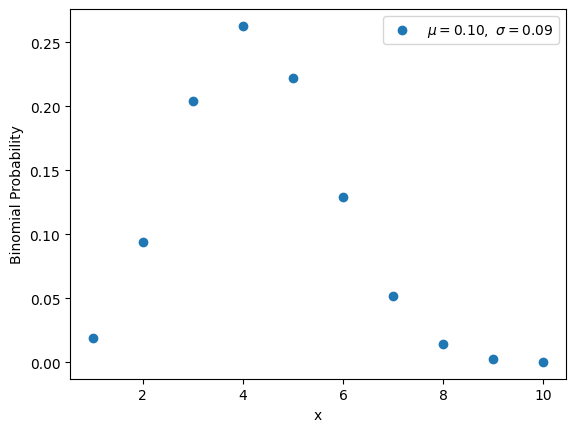

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from functools import reduce
import operator as op

# Fungsi const(n, r) untuk menghitung kombinasi nCr
def const(n, r):
    r = min(r, n - r)
    numer = reduce(op.mul, range(n, n - r, -1), 1)
    denom = reduce(op.mul, range(1, r + 1), 1)
    return numer / denom

# Fungsi binomial(n, p) untuk menghitung distribusi binomial
def binomial(n, p):
    q = 1 - p
    y = [const(n, k) * (p ** k) * (q ** (n - k)) for k in range(n)]
    return y, np.mean(y), np.std(y)

# Menghitung dan menampilkan distribusi binomial
percentage = 0.326
amount = 10
x_values = np.arange(1, 11)
total = 0

for x in x_values:
    if x > 5:
        y, u, s = binomial(amount, percentage)
        total += y[x - 1]

        # Menampilkan hasil distribusi binomial untuk x
        print(f"x = {x}, Binomial Probability = {y[x - 1]}")

print('\nTotal Probability for x > 5:', total)

# Membuat scatter plot dari hasil simulasi dengan label yang mencakup rata-rata dan deviasi standar
plt.scatter(x_values, y[:10], label=r'$\mu=%.2f,\ \sigma=%.2f$' % (u, s))
plt.xlabel("x")
plt.ylabel("Binomial Probability")
plt.legend()
plt.show()


Paldo

x = 6, Binomial Probability = 0.2006581248
x = 7, Binomial Probability = 0.11147673600000005
x = 8, Binomial Probability = 0.042467328000000006
x = 9, Binomial Probability = 0.010616832000000005
x = 10, Binomial Probability = 0.0015728640000000009

Total Probability for x > 5: 0.36679188480000013


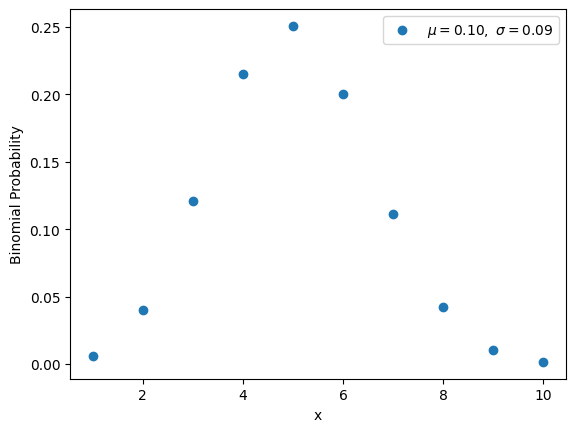

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from functools import reduce
import operator as op

# Fungsi const(n, r) untuk menghitung kombinasi nCr
def const(n, r):
    r = min(r, n - r)
    numer = reduce(op.mul, range(n, n - r, -1), 1)
    denom = reduce(op.mul, range(1, r + 1), 1)
    return numer / denom

# Fungsi binomial(n, p) untuk menghitung distribusi binomial
def binomial(n, p):
    q = 1 - p
    y = [const(n, k) * (p ** k) * (q ** (n - k)) for k in range(n)]
    return y, np.mean(y), np.std(y)

# Menghitung dan menampilkan distribusi binomial
percentage = 0.400
amount = 10
x_values = np.arange(1, 11)
total = 0

for x in x_values:
    if x > 5:
        y, u, s = binomial(amount, percentage)
        total += y[x - 1]

        # Menampilkan hasil distribusi binomial untuk x
        print(f"x = {x}, Binomial Probability = {y[x - 1]}")

print('\nTotal Probability for x > 5:', total)

# Membuat scatter plot dari hasil simulasi dengan label yang mencakup rata-rata dan deviasi standar
plt.scatter(x_values, y[:10], label=r'$\mu=%.2f,\ \sigma=%.2f$' % (u, s))
plt.xlabel("x")
plt.ylabel("Binomial Probability")
plt.legend()
plt.show()


Nongshim

x = 6, Binomial Probability = 0.24278450734151025
x = 7, Binomial Probability = 0.18231916425835842
x = 8, Binomial Probability = 0.09388298083483095
x = 9, Binomial Probability = 0.03172566510150418
x = 10, Binomial Probability = 0.006353175013989429

Total Probability for x > 5: 0.5570654925501933


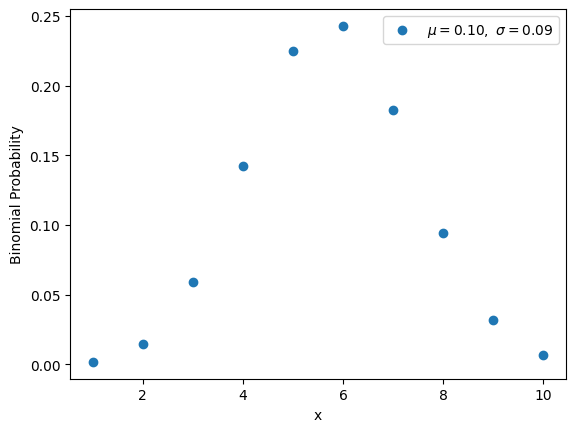

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from functools import reduce
import operator as op

# Fungsi const(n, r) untuk menghitung kombinasi nCr
def const(n, r):
    r = min(r, n - r)
    numer = reduce(op.mul, range(n, n - r, -1), 1)
    denom = reduce(op.mul, range(1, r + 1), 1)
    return numer / denom

# Fungsi binomial(n, p) untuk menghitung distribusi binomial
def binomial(n, p):
    q = 1 - p
    y = [const(n, k) * (p ** k) * (q ** (n - k)) for k in range(n)]
    return y, np.mean(y), np.std(y)

# Menghitung dan menampilkan distribusi binomial
percentage = 0.474
amount = 10
x_values = np.arange(1, 11)
total = 0

for x in x_values:
    if x > 5:
        y, u, s = binomial(amount, percentage)
        total += y[x - 1]

        # Menampilkan hasil distribusi binomial untuk x
        print(f"x = {x}, Binomial Probability = {y[x - 1]}")

print('\nTotal Probability for x > 5:', total)

# Membuat scatter plot dari hasil simulasi dengan label yang mencakup rata-rata dan deviasi standar
plt.scatter(x_values, y[:10], label=r'$\mu=%.2f,\ \sigma=%.2f$' % (u, s))
plt.xlabel("x")
plt.ylabel("Binomial Probability")
plt.legend()
plt.show()


Myojo

x = 6, Binomial Probability = 0.17631221601256641
x = 7, Binomial Probability = 0.08740624212212557
x = 8, Binomial Probability = 0.029712944462568086
x = 9, Binomial Probability = 0.006628545624723622
x = 10, Binomial Probability = 0.0008762883282019887

Total Probability for x > 5: 0.3009362365501857


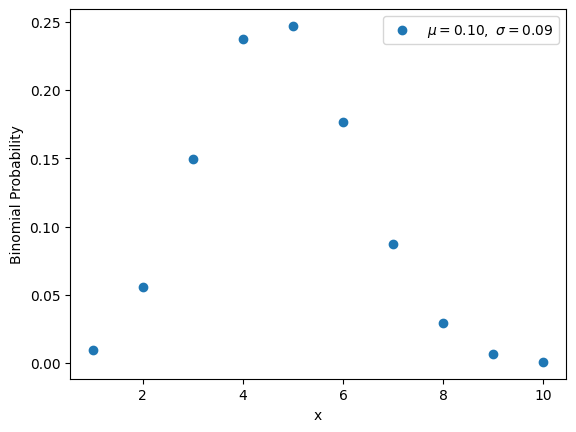

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from functools import reduce
import operator as op

# Fungsi const(n, r) untuk menghitung kombinasi nCr
def const(n, r):
    r = min(r, n - r)
    numer = reduce(op.mul, range(n, n - r, -1), 1)
    denom = reduce(op.mul, range(1, r + 1), 1)
    return numer / denom

# Fungsi binomial(n, p) untuk menghitung distribusi binomial
def binomial(n, p):
    q = 1 - p
    y = [const(n, k) * (p ** k) * (q ** (n - k)) for k in range(n)]
    return y, np.mean(y), np.std(y)

# Menghitung dan menampilkan distribusi binomial
percentage = 0.373
amount = 10
x_values = np.arange(1, 11)
total = 0

for x in x_values:
    if x > 5:
        y, u, s = binomial(amount, percentage)
        total += y[x - 1]

        # Menampilkan hasil distribusi binomial untuk x
        print(f"x = {x}, Binomial Probability = {y[x - 1]}")

print('\nTotal Probability for x > 5:', total)

# Membuat scatter plot dari hasil simulasi dengan label yang mencakup rata-rata dan deviasi standar
plt.scatter(x_values, y[:10], label=r'$\mu=%.2f,\ \sigma=%.2f$' % (u, s))
plt.xlabel("x")
plt.ylabel("Binomial Probability")
plt.legend()
plt.show()
